In [1]:
import sys
import keras_rcnn
from keras_rcnn import backend, datasets, layers, models, preprocessing
import numpy
import cv2
import matplotlib
import keras
import json
import rcnn_utils
import skimage
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Definitions

In [2]:
train_json_file = '../input/DSB208_train.json'
# test_json_file = '/home/paperspace/bowl/DSB208_test.json'
train_path = '../input/stage1_train/'
test_path = '../input/stage1_test/'
weights_path = '../models/rcnn.hdf5'

target_size=(256,256)
batch_size=1

train = True

classes = {
	"nucleus": 1
}

build model

In [3]:
print('building model...')
model_input = keras.layers.Input((None, None, 3))

model = keras_rcnn.models.RCNN(model_input, classes=len(classes) + 1)

model.load_weights(weights_path)

optimizer = keras.optimizers.Adam(0.0001)

model.compile(optimizer)
# model.summary(line_length=150)
# model.fit_generator(generator, epochs=10, steps_per_epoch=len(training))
# model.save_weights(weights_path)

building model...


/usr/local/lib/python3.6/site-packages/keras_rcnn/models/_rcnn.py:91: UserWarning: Output "object_detection_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "object_detection_1" during training.
  super(RCNN, self).compile(optimizer, None)


loading data...
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[211.   8. 239.  40.]
 [242.  55. 256.  77.]
 [161.  61. 194.  87.]
 [ 14. 238.  45. 256.]
 [ 52.   9.  74.  32.]
 [ 86.  19.  92.  30.]
 [235. 148. 256. 173.]
 [216. 122. 238. 145.]
 [182.   9. 202.  30.]
 [  0.   0.   5.  10.]
 [251. 127. 256. 146.]
 [231.   0. 256.  26.]
 [170.  96. 208. 128.]
 [192.  31. 210.  51.]
 [230. 182. 253. 206.]
 [196.  74. 202.  82.]]
[[211.   8. 239.  40.]
 [242.  55. 256.  77.]
 [161.  61. 194.  87.]
 [ 14. 238.  45. 256.]
 [ 52.   9.  74.  32.]
 [ 86.  19.  92.  30.]
 [235. 148. 256. 173.]
 [216. 122. 238. 145.]
 [182.   9. 202.  30.]
 [  0.   0.   5.  10.]
 [251. 127. 256. 146.]
 [231.   0. 256.  26.]
 [170.  96. 208. 128.]
 [192.  31. 210.  51.]
 [230. 182. 253. 206.]
 [196.  74. 202.  82.]]
[[211.   8. 239.  40.]
 [242.  55. 256.  77.]
 [161.  61. 194.  87.]
 [ 14. 238.  45. 256.]
 [ 52.   9.  74.  32.]
 [ 86.  19.  92.  30.]
 [235. 148. 256. 173.]
 [216. 122. 238. 145.]
 [182.   9. 202.  30.]
 [  0

[[  7.  12.  16.  23.]
 [ 42.  80.  51.  88.]
 [ 30. 105.  40. 113.]
 [150.   1. 160.  12.]
 [ 76.  45.  88.  57.]
 [241.  42. 251.  48.]
 [105.  94. 116. 106.]
 [ 67. 157.  74. 165.]
 [123.  94. 135. 105.]
 [128.  35. 140.  45.]
 [ 72. 155.  79. 164.]
 [242.  29. 252.  36.]
 [ 37.  74.  47.  82.]
 [237.  26. 248.  33.]
 [143.  39. 151.  49.]
 [  0. 194.   8. 205.]
 [ 20. 116.  32. 130.]
 [244.  37. 249.  42.]
 [ 57. 160.  68. 170.]
 [ 35. 105.  48. 114.]
 [ 66.  90.  75.  98.]
 [  0. 165.   8. 175.]
 [  0. 156.   8. 165.]
 [181.  14. 191.  27.]
 [ 63.  99.  70. 109.]
 [119. 102. 129. 113.]
 [252.  20. 256.  28.]
 [  0. 214.   3. 223.]
 [ 38.  92.  47. 101.]
 [210.   0. 221.   4.]
 [133.  85. 144.  97.]
 [234.   4. 244.  13.]]
[[  7.  12.  16.  23.]
 [ 42.  80.  51.  88.]
 [ 30. 105.  40. 113.]
 [150.   1. 160.  12.]
 [ 76.  45.  88.  57.]
 [241.  42. 251.  48.]
 [105.  94. 116. 106.]
 [ 67. 157.  74. 165.]
 [123.  94. 135. 105.]
 [128.  35. 140.  45.]
 [ 72. 155.  79. 164.]
 [242.  29

[[156.  46. 171.  82.]
 [211.  62. 234. 117.]
 [ 43. 109.  61. 123.]
 [105.  82. 118.  95.]
 [ 82. 195.  98. 218.]
 [232. 228. 248. 242.]
 [139.  16. 158.  52.]
 [221.  80. 251. 121.]
 [ 56. 136.  77. 152.]
 [ 30. 204.  37. 211.]
 [ 34. 152.  44. 161.]
 [ 28. 196.  36. 203.]
 [153. 208. 174. 233.]
 [129.  12. 144.  46.]
 [ 79. 238.  89. 256.]
 [  0.  80.   8.  89.]
 [ 63. 200.  71. 214.]
 [143. 184. 158. 212.]
 [ 10.  50.  16.  55.]
 [247. 200. 256. 208.]
 [ 67.   0.  80.  13.]
 [ 20. 112.  29. 123.]
 [ 19.   0.  34.  13.]
 [ 52. 249.  61. 256.]
 [240. 208. 256. 219.]
 [177. 225. 208. 239.]
 [202.  80. 219.  96.]
 [  0.   0.   5.   6.]
 [249. 173. 256. 177.]
 [211. 208. 236. 217.]
 [115.  10. 133.  45.]
 [129. 221. 147. 246.]
 [196. 217. 221. 229.]
 [ 42. 168.  54. 175.]
 [ 75.   0.  96.  34.]
 [179.  52. 197.  84.]
 [226. 186. 252. 194.]
 [ 35. 245.  55. 256.]
 [ 51.   9.  73.  33.]
 [114. 191. 124. 206.]
 [237. 179. 251. 184.]
 [183.  97. 198. 117.]
 [196.  49. 213.  82.]
 [ 91.  46.

[[156.  46. 171.  82.]
 [211.  62. 234. 117.]
 [ 43. 109.  61. 123.]
 [105.  82. 118.  95.]
 [ 82. 195.  98. 218.]
 [232. 228. 248. 242.]
 [139.  16. 158.  52.]
 [221.  80. 251. 121.]
 [ 56. 136.  77. 152.]
 [ 30. 204.  37. 211.]
 [ 34. 152.  44. 161.]
 [ 28. 196.  36. 203.]
 [153. 208. 174. 233.]
 [129.  12. 144.  46.]
 [ 79. 238.  89. 256.]
 [  0.  80.   8.  89.]
 [ 63. 200.  71. 214.]
 [143. 184. 158. 212.]
 [ 10.  50.  16.  55.]
 [247. 200. 256. 208.]
 [ 67.   0.  80.  13.]
 [ 20. 112.  29. 123.]
 [ 19.   0.  34.  13.]
 [ 52. 249.  61. 256.]
 [240. 208. 256. 219.]
 [177. 225. 208. 239.]
 [202.  80. 219.  96.]
 [  0.   0.   5.   6.]
 [249. 173. 256. 177.]
 [211. 208. 236. 217.]
 [115.  10. 133.  45.]
 [129. 221. 147. 246.]
 [196. 217. 221. 229.]
 [ 42. 168.  54. 175.]
 [ 75.   0.  96.  34.]
 [179.  52. 197.  84.]
 [226. 186. 252. 194.]
 [ 35. 245.  55. 256.]
 [ 51.   9.  73.  33.]
 [114. 191. 124. 206.]
 [237. 179. 251. 184.]
 [183.  97. 198. 117.]
 [196.  49. 213.  82.]
 [ 91.  46.

 [ 37.   0.  58.  13.]]
[[185. 247. 203. 256.]
 [ 95. 195. 125. 205.]
 [ 57.   0.  79.  22.]
 [229.  43. 246.  63.]
 [179. 230. 201. 251.]
 [183.  47. 217.  76.]
 [243. 115. 256. 137.]
 [ 46. 198.  93. 225.]
 [162. 169. 182. 185.]
 [196.  15. 220.  34.]
 [ 15. 233.  43. 256.]
 [181. 211. 207. 237.]
 [212. 250. 227. 256.]
 [147.   0. 175.  19.]
 [ 97.   0. 128.  24.]
 [226.   0. 244.   7.]
 [236.  68. 256.  93.]
 [247.  97. 256. 115.]
 [241. 207. 256. 227.]
 [238. 227. 256. 256.]
 [ 65. 238.  78. 252.]
 [135. 238. 161. 256.]
 [163.   8. 189.  31.]
 [147. 185. 164. 199.]
 [190.  83. 225. 118.]
 [ 52. 240.  68. 256.]
 [ 56. 236.  67. 248.]
 [220. 131. 256. 175.]
 [  0. 200.  15. 223.]
 [ 37.   0.  58.  13.]]
[[185. 247. 203. 256.]
 [ 95. 195. 125. 205.]
 [ 57.   0.  79.  22.]
 [229.  43. 246.  63.]
 [179. 230. 201. 251.]
 [183.  47. 217.  76.]
 [243. 115. 256. 137.]
 [ 46. 198.  93. 225.]
 [162. 169. 182. 185.]
 [196.  15. 220.  34.]
 [ 15. 233.  43. 256.]
 [181. 211. 207. 237.]
 [212. 25

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  0. 108.  19. 134.]
 [ 41.   0.  84.  32.]
 [ 99.  93. 127. 134.]
 [ 36. 149.  74. 177.]
 [ 77.  36. 103.  85.]
 [200.  51. 228.  83.]
 [  0. 135.  37. 166.]
 [116. 128. 147. 167.]
 [154.   0. 193.  31.]
 [204. 101. 238. 126.]
 [  0. 207.  29. 238.]
 [146. 228. 171. 256.]
 [134.   0. 157.   9.]
 [ 20. 120.  46. 146.]
 [201. 208. 241. 240.]
 [ 81. 205. 125. 230.]
 [170. 140. 196. 177.]
 [ 18.  74.  47. 107.]
 [153.  58. 185.  92.]
 [ 66. 238. 101. 256.]
 [239. 157. 256. 181.]]
[[  0. 108.  19. 134.]
 [ 41.   0.  84.  32.]
 [ 99.  93. 127. 134.]
 [ 36. 149.  74. 177.]
 [ 77.  36. 103.  85.]
 [200.  51. 228.  83.]
 [  0. 135.  37. 166.]
 [116. 128. 147. 167.]
 [154.   0. 193.  31.]
 [204. 101. 238. 126.]
 [  0. 207.  29. 238.]
 [146. 228. 171. 256.]
 [134.   0. 157.   9.]
 [ 20. 120.  46. 146.]
 [201. 208. 241. 240.]
 [ 81. 205. 125. 230.]
 [170. 140. 196. 177.]
 [ 18.  74.  47. 107.]
 [153.  58. 185.  92.]
 [ 66. 238. 101. 256.]
 [239. 157. 

/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
  6/670 [..............................] - ETA: 1:45:39 - loss: 21.4138

KeyboardInterrupt: 

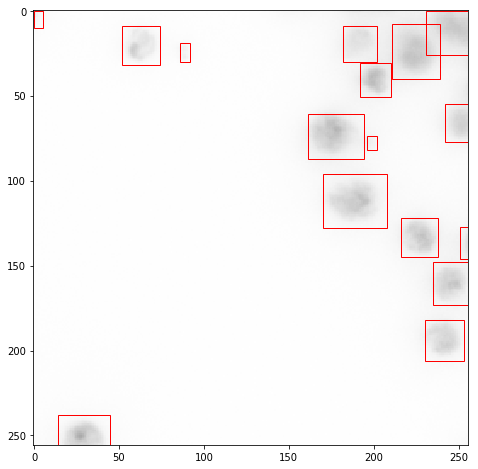

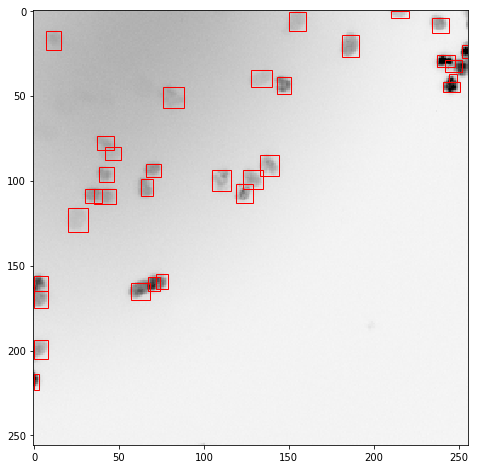

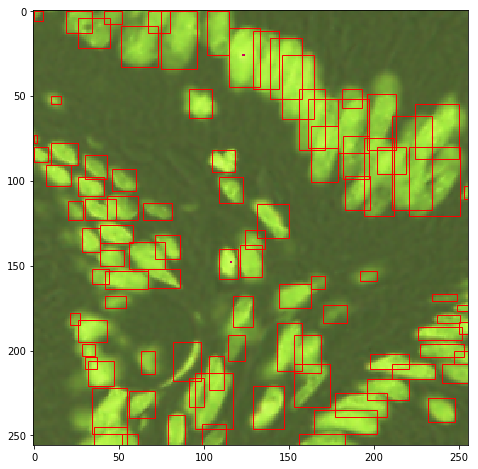

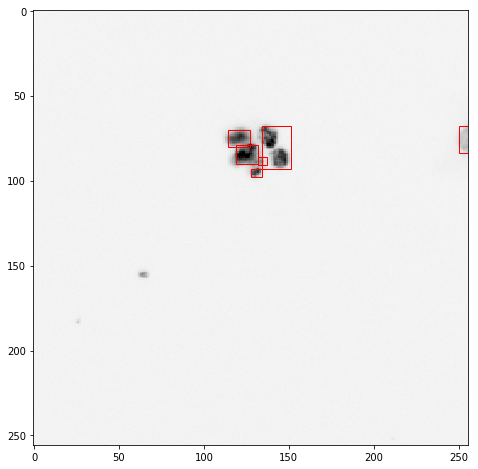

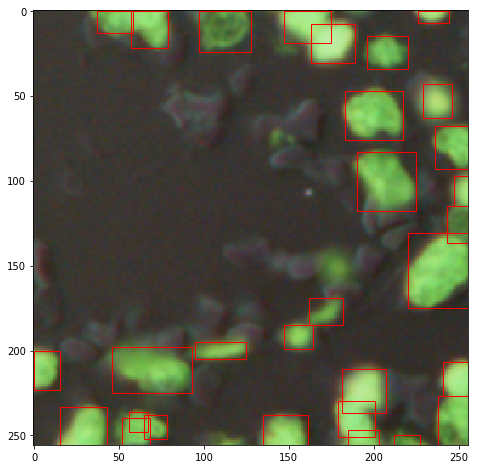

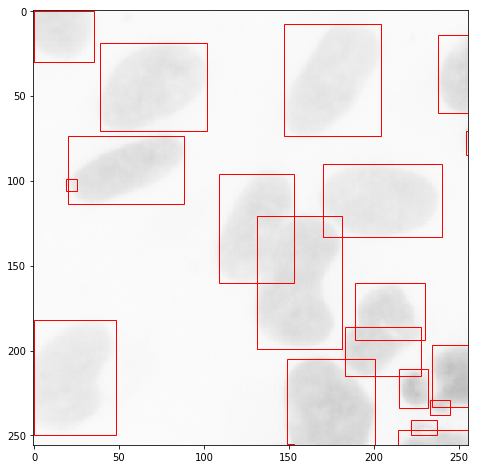

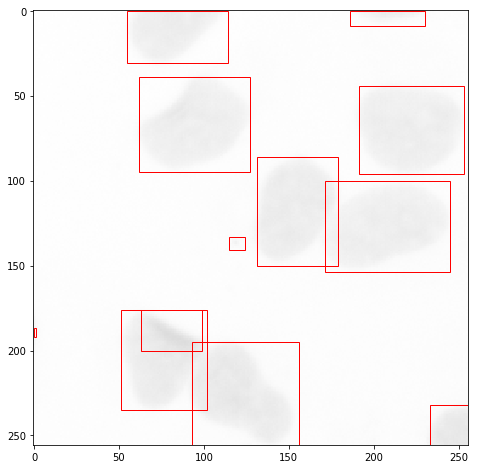

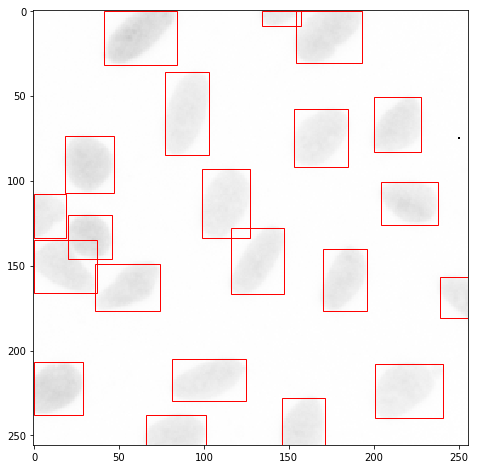

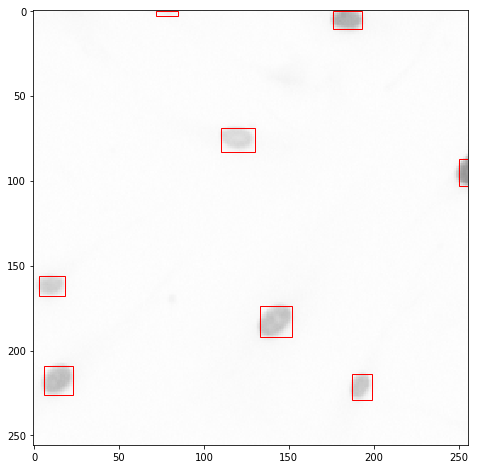

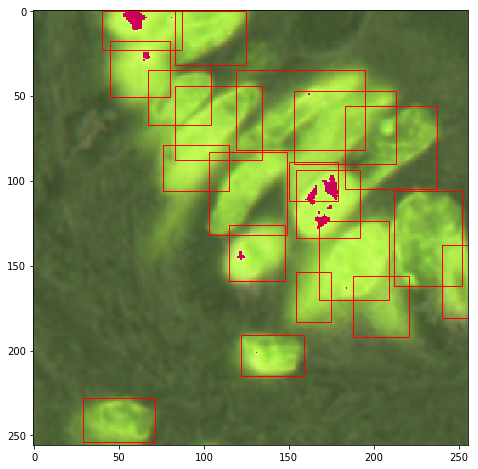

In [4]:
if train:
	with open(train_json_file, 'r') as file:
		training = json.load(file)

	#with open(train_json_file, 'w') as file:
	#	json.dump(training, file)
	#sys.exit()
	#for item in training:
	#	for object_ in item['objects']:
	#		if '/DSB2018' in object_['mask']['pathname']:
	#			object_['mask']['pathname'] = '../input' + object_['mask']['pathname'][object_['mask']['pathname'].find('/DSB2018'):]
	#with open(train_json_file, 'w') as file:
	#	json.dump(training, file)
	#sys.exit()
    
	for item in training:
		#item['shape'] = (item['image']['shape']['r'], item['image']['shape']['c'], item['image']['shape']['channels'])
		#item['filename'] = item['image']['pathname']
		#item['boxes'] = []
		#for x in item['objects']:
			#item['boxes'].append({})
			#item['boxes'][-1]['class'] = x['class']
			#item['boxes'].append([x['bounding_box']['minimum']['c'], x['bounding_box']['minimum']['r'], 
			#            x['bounding_box']['maximum']['c'], x['bounding_box']['maximum']['r']])
			#item['boxes'][-1]['x1'] = x['bounding_box']['minimum']['c']
			#item['boxes'][-1]['x2'] = x['bounding_box']['maximum']['c']
			#item['boxes'][-1]['y1'] = x['bounding_box']['minimum']['r']
			#item['boxes'][-1]['y2'] = x['bounding_box']['maximum']['r']
		# item['boxes'] = []
		# for x in item['objects']:

			# item['boxes'].append([x['bounding_box']['minimum']['c'], x['bounding_box']['minimum']['r'], 
			#            x['bounding_box']['maximum']['c'], x['bounding_box']['maximum']['r']])
		item['boxes'] = numpy.array(item['boxes'])
		item['class'] = numpy.array([[0,1] for x in range(len(item['boxes']))])

	print('loading data...')
	generator = iter(rcnn_utils.train_gen(training, target_size))
	# with open(train_json_file, 'w') as file:
	#   json.dump(training, file)
	# sys.exit()
	
	# training, validation = sklearn.model_selection.train_test_split(training)
	
	

	for _ in range(0,10):
		(target_bounding_boxes, target_image, target_scores, meta), _ = next(generator)
		target_bounding_boxes = numpy.reshape(target_bounding_boxes, (-1, 4))

		target_image = numpy.squeeze(target_image)

		target_scores = numpy.argmax(target_scores, -1)

		target_scores = numpy.reshape(target_scores, (-1))

		#print(target_bounding_boxes.shape)
		#print(target_image.shape)
		#print(target_scores.shape)

		_, axis = matplotlib.pyplot.subplots(1, figsize=(12, 8))

		axis.imshow(target_image)
		print(target_scores)
		#if len(list(target_scores)) > 0:
		for target_index, target_score in enumerate(target_scores):
			if target_score > 0:
				print(target_bounding_boxes)
				xy = [target_bounding_boxes[target_index][0],target_bounding_boxes[target_index][1]]
				#print(xy)
				w = target_bounding_boxes[target_index][2] - target_bounding_boxes[target_index][0]
				h = target_bounding_boxes[target_index][3] - target_bounding_boxes[target_index][1]
				rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")
				#print(xy, w, h)
				axis.add_patch(rectangle)

	#   matplotlib.pyplot.show()

	# sys.exit()




	# for i in range(0, 5):
	#   target_image = skimage.io.imread(training[i]['filename'])[:,:,:3]
	#   target_bounding_boxes = training[i]['boxes']
	#   target_scores = training[i]['class']
	#   #print('loading one image')
	#   #(target_bounding_boxes, target_image, target_scores, _), _ = generator.next()
	#   #print('loaded one image')
	#   #target_bounding_boxes = numpy.squeeze(target_bounding_boxes)

	#   #target_image = numpy.squeeze(target_image)

	#   # target_scores = numpy.argmax(target_scores, -1)

	#   # target_scores = numpy.squeeze(target_scores)

	#   _, axis = matplotlib.pyplot.subplots(1, figsize=(12, 8))

	#   axis.imshow(target_image)

	#   #for target_index, target_score in enumerate(target_scores):
	#   for i, box in enumerate(target_bounding_boxes):
	#       #if target_score > 0:
	#       target_score = target_scores[i]
	#       xy = [
	#           box['x1'],
	#           box['y1']
	#       ]

	#       w = box['x2'] - box['x1']
	#       h = box['y2'] - box['y1']

	#       rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

	#       axis.add_patch(rectangle)

	#   matplotlib.pyplot.show()
	model.fit_generator(generator, epochs=1, steps_per_epoch=len(training))
	model.save_weights(weights_path)


else:
	test_generator = rcnn_utils.test_gen(test_path)
	test_ids = next(os.walk(test_path))[1]
	# visualize prediction
	preds = []
	for i in range(0, len(test_ids)):
		example = next(test_generator)
		target_bounding_boxes, target_image, target_labels, _ = example
		#target_bounding_boxes = numpy.squeeze(target_bounding_boxes)
		target_image = numpy.squeeze(target_image)
		#target_labels = numpy.argmax(target_labels, -1)
		#target_labels = numpy.squeeze(target_labels)
		# output_anchors, output_proposals, output_deltas, output_scores = model.predict(example)
		output_anchors, output_scores = model.predict(example)
		preds.append((output_anchors, output_scores))
		output_anchors = numpy.squeeze(output_anchors)
		# output_proposals = numpy.squeeze(output_proposals)
		# output_deltas = numpy.squeeze(output_deltas)
		output_scores = numpy.squeeze(output_scores)
		print(output_anchors)
		print(output_scores)
		_, axis = matplotlib.pyplot.subplots(1)
		axis.imshow(target_image)
		axis.set_title(test_ids[i])
		#for index, label in enumerate(target_labels):
		#   if label == 1:
		#       xy = [
		#       target_bounding_boxes[index][0],
		#       target_bounding_boxes[index][1]
		#       ]
		#       w = target_bounding_boxes[index][2] - target_bounding_boxes[index][0]
		#       h = target_bounding_boxes[index][3] - target_bounding_boxes[index][1]
		#       rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="g", facecolor="none")
		#       axis.add_patch(rectangle)
		for index, score in enumerate(output_scores):
			if score[1] > 0.50:
				xy = [
				output_anchors[index][0],
				output_anchors[index][1]
				]
				w = output_anchors[index][2] - output_anchors[index][0]
				h = output_anchors[index][3] - output_anchors[index][1]
				rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")
				axis.add_patch(rectangle)
		matplotlib.pyplot.show()